# WOMEN'S HACK FOR SAFETY

## INTRODUCTION

South Africa has one of the highest crime rates in Africa, with approximately 2 million crimes reported every year. Women experience crime and are vulnerable to crime in different ways from men.

Let's build a machine learning model that predicts a woman’s level of risk of being victimized by a crime given 
basic information about her and her life.

<img src="GBV.jpg" style="width:680px;height:380px"/>

## DATA PREPARATION AND EXPLORATORY ANALYSIS

### Importing Libraries and Datasets

In [1]:
# Importing libraries

import numpy as np # for scientific computing
import pandas as pd # for data manipulation, analysis and cleaning
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from matplotlib import style # for data visualization
style.use('ggplot')
sns.set_style('darkgrid')

# Libraries for modelling
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

print("Done importing libraries...")

Done importing libraries...


In [2]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")

In [3]:
#Copying Datasets

train = train_df.copy()
test = test_df.copy()

print("Done copying datasets!!")

Done copying datasets!!


In [4]:
#Merging Datasets

train_df['train']= 1
test_df['train']= 0
dataset = [train_df,test_df]
all_data = pd.concat(dataset)

print("Done merging datasets!!")

Done merging datasets!!


### Data Exploration

In [5]:
train_df.head()

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,...,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,target,train
0,ID_00008683,Female,20,Black African,Dwelling/house or brick/concrete block structu...,Formal,North West,NW - Non Metro,66710095,South Africa,...,Xitsonga,Setswana,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable,0,1
1,ID_00061163,Female,42,Black African,Dwelling/house or brick/concrete block structu...,Formal,Limpopo,LP - Non Metro,98510279,South Africa,...,Sepedi,Sepedi,Grade 12/Standard 10/Form 5/Matric (No Exemption),Yes,No,No,Not applicable,Permanent,0,1
2,ID_00071403,Female,86,Black African,Dwelling/house or brick/concrete block structu...,Formal,Eastern Cape,EC - Non Metro,29210321,South Africa,...,IsiXhosa,IsiXhosa,Unspecified,No,No,No,No,Not applicable,0,1
3,ID_00077803,Female,20,Black African,Town house (semi-detached house in complex),Formal,KwaZulu-Natal,KZN - eThekwini,59913860,South Africa,...,IsiZulu,IsiZulu,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0,1
4,ID_00086763,Female,26,Black African,Town house (semi-detached house in complex),Formal,Gauteng,GP - City of Johannesburg,79813828,South Africa,...,Setswana,English,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0,1


In [6]:
test_df.head()

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,...,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,train
0,ID_00241643,Female,23,Coloured,Dwelling/house or brick/concrete block structu...,Formal,Northern Cape,NC - Non Metro,36410104,South Africa,...,Single and have never been married/never lived...,Afrikaans,Afrikaans,Grade 10/Standard 8/Form 3,Yes,No,No,Not applicable,Permanent,0
1,ID_00312043,Female,64,Black African,Dwelling/house or brick/concrete block structu...,Formal,Limpopo,LP - Non Metro,97410477,South Africa,...,Widowed,Afrikaans,Afrikaans,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0
2,ID_00345323,Female,18,Black African,Unspecified,Unspecified,Eastern Cape,EC - Buffalo City,26011572,South Africa,...,Single and have never been married/never lived...,IsiXhosa,IsiXhosa,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable,0
3,ID_00369643,Female,19,Black African,Dwelling/house or brick/concrete block structu...,Formal,Mpumalanga,MP - Non Metro,87710674,South Africa,...,Single and have never been married/never lived...,Xitsonga,Sepedi,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0
4,ID_00381163,Female,24,Black African,Dwelling/house or brick/concrete block structu...,Formal,Mpumalanga,MP - Non Metro,87411106,South Africa,...,Single and have never been married/never lived...,SiSwati,SiSwati,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable,0


In [7]:
print('Train_df size: {}\n Test_df size: {}'.format(train_df.shape,test_df.shape))

Train_df size: (7736, 22)
 Test_df size: (3316, 21)


In [8]:
# Missing data

all_data.isnull().sum()

ID                      0
gender                  0
age                     0
race                    0
dwelling                0
dwelling_type           0
province_code           0
metro_code              0
psu                     0
nationality             0
RTH                     0
marital_st              0
Lang_inside             0
Lang_outside            0
Education               0
lw_work                 0
lw_business             0
help_on_household       0
job_or_business         0
nature_of_work          0
target               3316
train                   0
dtype: int64

In [9]:
train_df.describe()

,age,psu,target,train
count,7736.000000,7.736000e+03,7736.000000,7736.0
mean,42.193252,6.078730e+07,0.078206,1.0
std,17.269251,2.548540e+07,0.268513,0.0
min,16.000000,1.601007e+07,0.000000,1.0
25%,29.000000,3.681004e+07,0.000000,1.0
50%,39.000000,5.991442e+07,0.000000,1.0
75%,54.000000,7.991039e+07,0.000000,1.0
max,102.000000,9.871054e+07,1.000000,1.0


In [10]:
test_df.describe()

,age,psu,train
count,3316.000000,3.316000e+03,3316.0
mean,41.414053,6.168885e+07,0.0
std,17.028948,2.551864e+07,0.0
min,16.000000,1.601007e+07,0.0
25%,28.000000,3.741003e+07,0.0
50%,38.000000,6.621058e+07,0.0
75%,53.000000,7.991159e+07,0.0
max,98.000000,9.871053e+07,0.0


In [11]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Data Visualization

<AxesSubplot:xlabel='target', ylabel='count'>

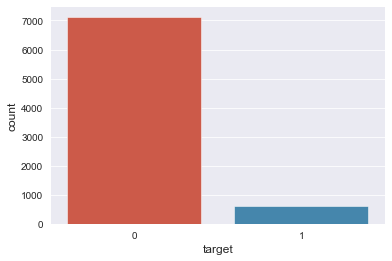

In [12]:
sns.countplot(train_df["target"])

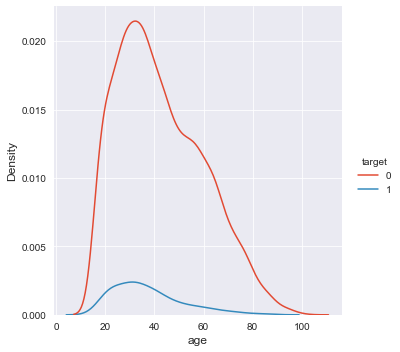

In [13]:
sns.displot( train_df , x = 'age', hue='target' , kind = 'kde')
plt.show()

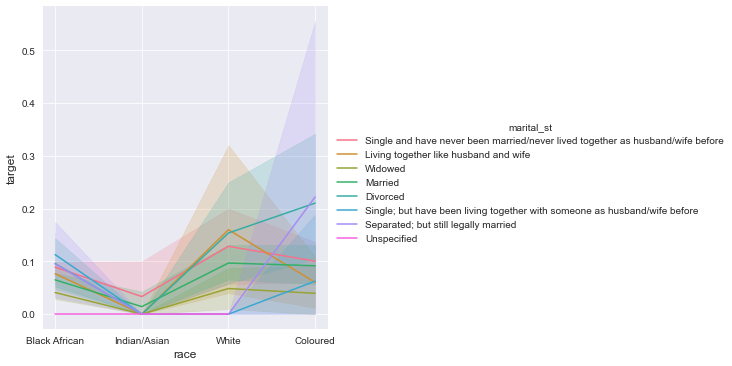

In [14]:
sns.relplot(x='race', y='target', hue='marital_st',kind='line', data=train_df)
plt.show()

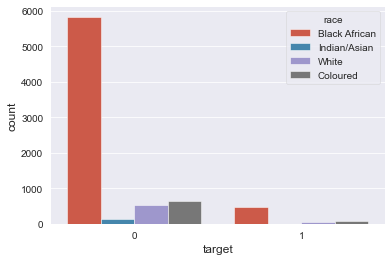

In [15]:
sns.countplot(x="target", hue='race', data=train_df)
plt.show()

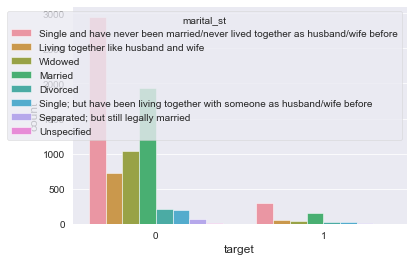

In [16]:
sns.countplot(x="target", hue='marital_st', data=train_df)
plt.show()

### Data Preprocessing

In [17]:
# making age bins

age_bin_labels = [1, 2, 3,4,5,6]

all_data['Binned_Age'] =  pd.qcut(all_data['age'], q=6, labels=age_bin_labels).astype(int)

In [19]:
all_data['dwelling'].unique()

array(['Dwelling/house or brick/concrete block structure on a separate stand or yard or farm',
       'Town house (semi-detached house in complex)',
       'Room/flat let on a property or a larger dwelling/servants quarters/granny flat',
       'Informal dwelling/shack in backyard',
       'Flat or apartment in a block of flats',
       'Traditional dwelling/hut/structure made of traditional materials',
       'Dwelling/house/flat/room in backyard',
       'Informal dwelling/shack not in backyard, e.g in an informal/squatter settlement or on a farm.',
       'Unspecified', 'Cluster house in complex', 'Other (specify)',
       'Semi-Detached house', 'Caravan/tent'], dtype=object)

In [20]:
all_data['dwelling_type'].unique()

array(['Formal', 'Informal', 'Unspecified'], dtype=object)

In [21]:
all_data['psu'].nunique()

3059

In [38]:
train['nationality'].unique()

array(['South Africa', 'Other', 'Unspecified'], dtype=object)

In [22]:
all_data = all_data.drop(['ID','gender','psu','age','metro_code','dwelling_type'], axis =1)

In [23]:
all_data.columns

Index(['race', 'dwelling', 'province_code', 'nationality', 'RTH', 'marital_st',
       'Lang_inside', 'Lang_outside', 'Education', 'lw_work', 'lw_business',
       'help_on_household', 'job_or_business', 'nature_of_work', 'target',
       'train', 'Binned_Age'],
      dtype='object')

In [25]:
col = ['race', 'dwelling', 'province_code', 'nationality',
       'RTH', 'marital_st', 'Lang_inside', 'Lang_outside', 'Education',
       'lw_work', 'lw_business', 'help_on_household', 'job_or_business',
       'nature_of_work', 'Binned_Age']

all_data = pd.get_dummies(all_data, columns= col)

In [26]:
all_data.head()

,target,train,race_Black African,race_Coloured,race_Indian/Asian,race_White,dwelling_Caravan/tent,dwelling_Cluster house in complex,dwelling_Dwelling/house or brick/concrete block structure on a separate stand or yard or farm,dwelling_Dwelling/house/flat/room in backyard,...,nature_of_work_Permanent,nature_of_work_Seasonal,nature_of_work_Temporary,nature_of_work_Unspecified,Binned_Age_1,Binned_Age_2,Binned_Age_3,Binned_Age_4,Binned_Age_5,Binned_Age_6
0,0.0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.0,1,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,0.0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [27]:
train_df = all_data[all_data['train']== 1]
test_df = all_data[all_data['train']== 0]

In [28]:
features = train_df.drop(['target','train'], axis=1)
label = train_df.target

In [29]:
print('Number of class 1 samples before:',features[label == 1].shape[0])

Number of class 1 samples before: 605


In [31]:
from sklearn.utils import resample

features_upsampled, label_upsampled = resample(features[label == 1],label[label == 1],n_samples=features[label == 0].shape[0],random_state=50)
print('Number of class 1 samples after:',features_upsampled.shape[0])

Number of class 1 samples after: 7131


In [43]:
X_bal = np.vstack((features[label == 0], features_upsampled))
y_bal = np.hstack((label[label == 0], label_upsampled))
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

50.0

In [55]:
X_train, X_val, y_train, y_val = train_test_split(features, label, test_size=0.33, random_state=42)

## MODEL BUILDING AND EVALUATION

### Model Building

In [54]:
import re
features = features.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

test_df = test_df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [34]:
from sklearn.model_selection import GridSearchCV

In [45]:
params = {'bagging_temperature': [0.6,0.7,0.8,0.9],
               'depth': [5,6,7,8], #can be up to 16, good(1 to 10)
               'iterations': [300,500,700,900], #max number of trees
               'l2_leaf_reg': [10,20,25,30],
               'learning_rate': [0.01,0.03,0.05,0.1], #affects trainning time and reduces gradient step
               'random_strength': [0.5,0.6,0.8,0.9]}

In [46]:
cat = CatBoostClassifier()

In [47]:
grid_cat= GridSearchCV(estimator=cat, param_grid = params,scoring="roc_auc",cv = 3, n_jobs=-1)
grid_cat.fit(X_train, y_train)

0:	learn: 0.6421057	total: 281ms	remaining: 1m 23s
1:	learn: 0.5967873	total: 309ms	remaining: 46s
2:	learn: 0.5569130	total: 314ms	remaining: 31.1s
3:	learn: 0.5215565	total: 319ms	remaining: 23.6s
4:	learn: 0.4913393	total: 324ms	remaining: 19.1s
5:	learn: 0.4647626	total: 330ms	remaining: 16.2s
6:	learn: 0.4411138	total: 335ms	remaining: 14s
7:	learn: 0.4201835	total: 341ms	remaining: 12.4s
8:	learn: 0.4017099	total: 346ms	remaining: 11.2s
9:	learn: 0.3860128	total: 352ms	remaining: 10.2s
10:	learn: 0.3715500	total: 357ms	remaining: 9.38s
11:	learn: 0.3590184	total: 362ms	remaining: 8.7s
12:	learn: 0.3480420	total: 368ms	remaining: 8.13s
13:	learn: 0.3386063	total: 374ms	remaining: 7.64s
14:	learn: 0.3302928	total: 379ms	remaining: 7.21s
15:	learn: 0.3228606	total: 385ms	remaining: 6.83s
16:	learn: 0.3162238	total: 390ms	remaining: 6.5s
17:	learn: 0.3100385	total: 396ms	remaining: 6.2s
18:	learn: 0.3050313	total: 401ms	remaining: 5.93s
19:	learn: 0.3005014	total: 407ms	remaining: 5.

183:	learn: 0.2412855	total: 1.47s	remaining: 926ms
184:	learn: 0.2412181	total: 1.47s	remaining: 917ms
185:	learn: 0.2410790	total: 1.48s	remaining: 907ms
186:	learn: 0.2410573	total: 1.49s	remaining: 898ms
187:	learn: 0.2409944	total: 1.49s	remaining: 889ms
188:	learn: 0.2408802	total: 1.5s	remaining: 880ms
189:	learn: 0.2408654	total: 1.5s	remaining: 871ms
190:	learn: 0.2408453	total: 1.51s	remaining: 861ms
191:	learn: 0.2407488	total: 1.51s	remaining: 853ms
192:	learn: 0.2407308	total: 1.52s	remaining: 843ms
193:	learn: 0.2407098	total: 1.53s	remaining: 834ms
194:	learn: 0.2406562	total: 1.53s	remaining: 825ms
195:	learn: 0.2405604	total: 1.54s	remaining: 816ms
196:	learn: 0.2404791	total: 1.54s	remaining: 807ms
197:	learn: 0.2403740	total: 1.55s	remaining: 798ms
198:	learn: 0.2403581	total: 1.55s	remaining: 789ms
199:	learn: 0.2402806	total: 1.56s	remaining: 780ms
200:	learn: 0.2401896	total: 1.56s	remaining: 771ms
201:	learn: 0.2401096	total: 1.57s	remaining: 763ms
202:	learn: 0.

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000017756EA1A60>,
             n_jobs=-1,
             param_grid={'bagging_temperature': [0.6, 0.7, 0.8, 0.9],
                         'depth': [5, 6, 7, 8],
                         'iterations': [300, 500, 700, 900],
                         'l2_leaf_reg': [10, 20, 25, 30],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1],
                         'random_strength': [0.5, 0.6, 0.8, 0.9]},
             scoring='roc_auc')

In [48]:
print(" Results from Grid Search " )
print(f"\n The best estimator across ALL searched params:\n {grid_cat.best_estimator_}")
print(f"\n The best score across ALL searched params:\n {grid_cat.best_score_}")
print(f"\n The best parameters across ALL searched params:\n {grid_cat.best_params_}")

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.6163301498634824

 The best parameters across ALL searched params:
 {'bagging_temperature': 0.6, 'depth': 5, 'iterations': 300, 'l2_leaf_reg': 20, 'learning_rate': 0.05, 'random_strength': 0.5}


In [49]:
cat_params = {'bagging_temperature': 0.6,
               'depth': 5,
               'num_iterations': 300,
               'l2_leaf_reg': 20,
               'learning_rate': 0.05,
               'random_strength': 0.5}

In [56]:
lgbm_params = {'boosting_type': "dart",
               'objective': "binary",
               'num_iterations': 800,
               'learning_rate': 0.03,
               'num_leaves': 50}

In [57]:
cat = CatBoostClassifier(**cat_params)
lgm = LGBMClassifier(**lgbm_params)

classifier = [lgm,cat]
classifier_names = ['LR','CAT']

In [58]:
def pred (model):
    for i, model in enumerate(classifier):
        model.fit(X_train,y_train)
        pred = model.predict_proba(X_val)[:,1]
        roc = roc_auc_score(y_val,pred)
        print(f'{classifier_names[i]}:{roc}')

In [59]:
pred(classifier)

LR:0.60514273854908
0:	learn: 0.6421057	total: 158ms	remaining: 47.1s
1:	learn: 0.5967873	total: 177ms	remaining: 26.3s
2:	learn: 0.5569130	total: 184ms	remaining: 18.3s
3:	learn: 0.5215565	total: 192ms	remaining: 14.2s
4:	learn: 0.4913393	total: 199ms	remaining: 11.8s
5:	learn: 0.4647626	total: 206ms	remaining: 10.1s
6:	learn: 0.4411138	total: 212ms	remaining: 8.86s
7:	learn: 0.4201835	total: 217ms	remaining: 7.91s
8:	learn: 0.4017099	total: 222ms	remaining: 7.17s
9:	learn: 0.3860128	total: 227ms	remaining: 6.57s
10:	learn: 0.3715500	total: 232ms	remaining: 6.09s
11:	learn: 0.3590184	total: 237ms	remaining: 5.68s
12:	learn: 0.3480420	total: 241ms	remaining: 5.33s
13:	learn: 0.3386063	total: 246ms	remaining: 5.03s
14:	learn: 0.3302928	total: 251ms	remaining: 4.78s
15:	learn: 0.3228606	total: 256ms	remaining: 4.55s
16:	learn: 0.3162238	total: 261ms	remaining: 4.35s
17:	learn: 0.3100385	total: 266ms	remaining: 4.17s
18:	learn: 0.3050313	total: 271ms	remaining: 4.01s
19:	learn: 0.3005014	

190:	learn: 0.2408453	total: 1.21s	remaining: 691ms
191:	learn: 0.2407488	total: 1.22s	remaining: 685ms
192:	learn: 0.2407308	total: 1.22s	remaining: 678ms
193:	learn: 0.2407098	total: 1.23s	remaining: 671ms
194:	learn: 0.2406562	total: 1.23s	remaining: 665ms
195:	learn: 0.2405604	total: 1.24s	remaining: 658ms
196:	learn: 0.2404791	total: 1.24s	remaining: 651ms
197:	learn: 0.2403740	total: 1.25s	remaining: 644ms
198:	learn: 0.2403581	total: 1.25s	remaining: 637ms
199:	learn: 0.2402806	total: 1.26s	remaining: 630ms
200:	learn: 0.2401896	total: 1.26s	remaining: 623ms
201:	learn: 0.2401096	total: 1.27s	remaining: 616ms
202:	learn: 0.2400661	total: 1.27s	remaining: 609ms
203:	learn: 0.2400436	total: 1.28s	remaining: 602ms
204:	learn: 0.2399878	total: 1.28s	remaining: 595ms
205:	learn: 0.2399039	total: 1.29s	remaining: 588ms
206:	learn: 0.2398790	total: 1.29s	remaining: 581ms
207:	learn: 0.2398192	total: 1.3s	remaining: 575ms
208:	learn: 0.2397200	total: 1.3s	remaining: 568ms
209:	learn: 0.

## PREDICTION AND SUBMISSION

### Prediction

Two (2) models using LightGBMClassifier(60.51%),CatBoostClassifier(60.60%) were built and evaluated.

CatBoostRegression was the best model with a higher roc_auc_score of 60.60%.

In [60]:
test_df.head()

,target,train,race_BlackAfrican,race_Coloured,race_IndianAsian,race_White,dwelling_Caravantent,dwelling_Clusterhouseincomplex,dwelling_Dwellinghouseorbrickconcreteblockstructureonaseparatestandoryardorfarm,dwelling_Dwellinghouseflatroominbackyard,...,nature_of_work_Permanent,nature_of_work_Seasonal,nature_of_work_Temporary,nature_of_work_Unspecified,Binned_Age_1,Binned_Age_2,Binned_Age_3,Binned_Age_4,Binned_Age_5,Binned_Age_6
0,NaN,0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1,NaN,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,NaN,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,NaN,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,NaN,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [61]:
test_features = test_df.drop(['target','train'], axis =1)

In [62]:
test_features.shape

(3316, 140)

In [63]:
#lgm = LGBMClassifier(n_estimators=1500)
#lgm.fit(X, y)
#test_predi = lgm.predict_proba(test_features)[:,1]

cat = CatBoostClassifier(**cat_params)
cat.fit(features, label)
test_predi = cat.predict_proba(test_features)[:,1]

#vcf = VotingClassifier(estimators=[('lr', lgm),('cat',cat)], voting='soft')
#vcf.fit(X,y)
#test_predi = vcf.predict_proba(test_features)[:,1]

0:	learn: 0.6426270	total: 24.7ms	remaining: 7.39s
1:	learn: 0.5985323	total: 39.9ms	remaining: 5.94s
2:	learn: 0.5597156	total: 53.6ms	remaining: 5.31s
3:	learn: 0.5255161	total: 62.9ms	remaining: 4.65s
4:	learn: 0.4955017	total: 70.5ms	remaining: 4.16s
5:	learn: 0.4691271	total: 78.2ms	remaining: 3.83s
6:	learn: 0.4461315	total: 85.8ms	remaining: 3.59s
7:	learn: 0.4258166	total: 92.2ms	remaining: 3.36s
8:	learn: 0.4079741	total: 98.6ms	remaining: 3.19s
9:	learn: 0.3918253	total: 105ms	remaining: 3.05s
10:	learn: 0.3776483	total: 113ms	remaining: 2.96s
11:	learn: 0.3653209	total: 119ms	remaining: 2.86s
12:	learn: 0.3544540	total: 126ms	remaining: 2.77s
13:	learn: 0.3448436	total: 132ms	remaining: 2.7s
14:	learn: 0.3363933	total: 138ms	remaining: 2.63s
15:	learn: 0.3291410	total: 145ms	remaining: 2.57s
16:	learn: 0.3226423	total: 151ms	remaining: 2.52s
17:	learn: 0.3166479	total: 157ms	remaining: 2.46s
18:	learn: 0.3115060	total: 163ms	remaining: 2.42s
19:	learn: 0.3070167	total: 169ms

173:	learn: 0.2513967	total: 1.25s	remaining: 909ms
174:	learn: 0.2513298	total: 1.26s	remaining: 902ms
175:	learn: 0.2513056	total: 1.27s	remaining: 896ms
176:	learn: 0.2511929	total: 1.28s	remaining: 889ms
177:	learn: 0.2511495	total: 1.29s	remaining: 884ms
178:	learn: 0.2511227	total: 1.3s	remaining: 879ms
179:	learn: 0.2509828	total: 1.31s	remaining: 871ms
180:	learn: 0.2509035	total: 1.32s	remaining: 867ms
181:	learn: 0.2508573	total: 1.32s	remaining: 860ms
182:	learn: 0.2508106	total: 1.33s	remaining: 852ms
183:	learn: 0.2507335	total: 1.34s	remaining: 847ms
184:	learn: 0.2506359	total: 1.35s	remaining: 839ms
185:	learn: 0.2506020	total: 1.36s	remaining: 832ms
186:	learn: 0.2504667	total: 1.37s	remaining: 826ms
187:	learn: 0.2503759	total: 1.38s	remaining: 819ms
188:	learn: 0.2502336	total: 1.38s	remaining: 812ms
189:	learn: 0.2500935	total: 1.39s	remaining: 806ms
190:	learn: 0.2500514	total: 1.4s	remaining: 798ms
191:	learn: 0.2500241	total: 1.41s	remaining: 791ms
192:	learn: 0.

In [65]:
import shap

In [66]:
explainer = shap.Explainer(cat)
shap_values = explainer(features)

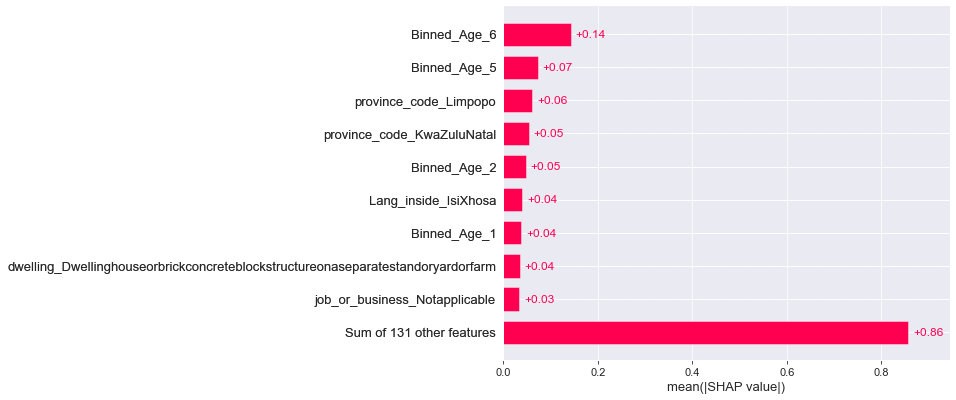

In [67]:
shap.plots.bar(shap_values)

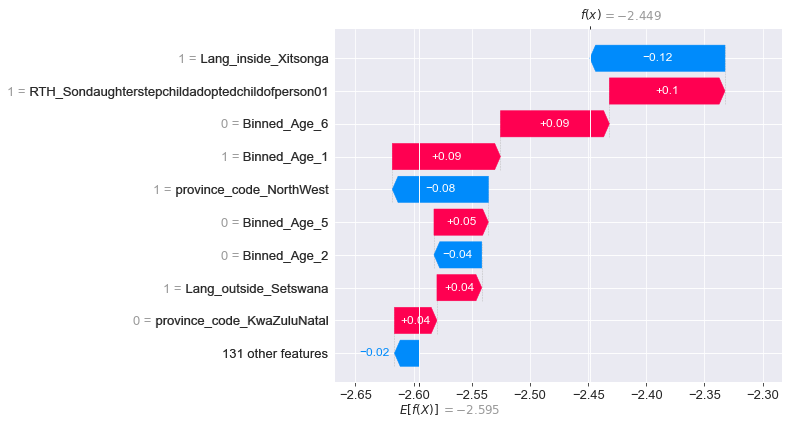

In [68]:
shap.plots.waterfall(shap_values[0])

### Submission

In [69]:
final_sub = pd.DataFrame({'ID':test.ID,
                          'target': test_predi})
final_sub.to_csv('safety_sub3.csv', index = False)

print('Submission successfully saved...')

Submission successfully saved...


In [70]:
final_sub.head()

,ID,target
0,ID_00241643,0.096080
1,ID_00312043,0.028012
2,ID_00345323,0.138181
3,ID_00369643,0.074205
4,ID_00381163,0.078209
